In [69]:
# imports
import math

# Canal cobra 1$ x persona.
# 10,000,000$ para invertir en publicidad.

# TP 3: MKT Publicidades

#### Integrantes
- Mirra, Ariel Marcelo.
- Ricci, Juan Gabriel.

#### Docentes
- Olmedo, Agustin.
- Gioia, Alicia.

### Resumen
TODO

### Introduccion
Este trabajo consiste en el uso de las herramientas aprendidas en clase (Runge-Kutta, matplotlib, etc.) para la resolucion de un problema real: medir el impacto de una publicidad utilizando la ecuación de la curva logística.

### 0) Importe de datos
Se obtendran los datos de los archivos 'coeficientes_canal.csv' (valores de k para cada canal) y 'televidentes_canal_horario.csv' (valores de M para cada canal y horario).

In [ ]:
# Coeficiente K: 
coef_k = []
f = open("coeficientes_canal.csv", "r")
f.readline()  # first line is not desired, bypassing it.
for row in f:
    coef_k.append(row.split(","))
f.close()
            
# Televidentes
tv_viewers_channels = []
f = open("televidentes_canal_horario.csv", "r")
for row in f:
    tv_viewers_channels.append(row.split(","))
f.close()

### 1) Implementar la ecuación de la curva logística
Se hara uso de los 'lambdas' de Python para implementar las diferentes funciones.
En el caso de la curva logistica dada, recibe un instante de tiempo $ t $ asi como una constante $ k $ y $ M $ que son por lo tanto requeridas en la implementacion como parametro.

In [70]:
y = lambda k, M, t : (M / (1 + math.exp(-k * M * t)))

### 2) Implementar el algoritmo de Runge-Kutta de orden 4
Primeramente se explicara el metodo, luego su desarrollo para la problematica presentada

---
#### Ecuaciones 
$ y_{i+1}=y_i + \frac{1}{6} \cdot (k_1 + 2 \cdot k_2 + 2 \cdot k_3 + k_4) $

$ k_1 = f(x_i                      ,     y_i                                ) $

$ k_2 = f(x_i + \frac{1}{2} h,     y_i + \frac{1}{2} k_1 h) $

$ k_3 = f(x_i + \frac{1}{2} h,     y_i + \frac{1}{2} k_2 h) $

$ k_4 = f(x_i +                   h,     y_i + k_3             h) $

#### Development 1
Runge-Kutta me pide una funcion $ \frac{dy}{dx} $, y luego un valor inicial $ x_0 $ y $ y_0 $ asi como un valor $ h $ delta. 

Decimos entonces que $ \frac{dy}{dx} = f(x, y) $ y $ y(x_0) = y_0 $

In [ ]:
y_deriv  = lambda k, M, t : k * y(k, M, t) * (M - y(k, M, t))  # calculates y from existing y(k, M, t)
y_deriv_2 = lambda k, M, t, yi: k * yi * (M - yi)  # uses calculated yi, which is given


y_next    = lambda k, M, t, yi, h: y0 + 1/6*(k1(k, M, t, yi) + 2*k2(k, M, t, yi) 
                                             + 2*k3(k, M, t, yi) + k4(k, M, t, yi)) * h
k1        = lambda k, M, t, yi   : y_deriv_2(k, M, t            , yi                              )
k2        = lambda k, M, t, yi   : y_deriv_2(k, M, t + (1/2 * h), yi + (1/2 * k1(k, M, t, yi) * h))
k3        = lambda k, M, t, yi   : y_deriv_2(k, M, t + (1/2 * h), yi + (1/2 * k2(k, M, t, yi) * h))
k4        = lambda k, M, t, yi   : y_deriv_2(k, M, t +        h , yi + (      k3(k, M, t, yi) * h))

### 3) Calcular utilizando el algoritmo de Runge-Kutta el impacto de la publicidad en cada canal y horario en 10 instantes de tiempo. Generar archivos csv para cada instante con el impacto de la publicidad para canal y horario.
#### Development 2
En nuestro caso tenemos los valores de $k$ y $M$ en listas.
El valor inicial $y_0$ se calculara usando la ecuacion logistica en un instante $t=0$.
Iterando en los canales y horarios aplicamos el algoritmo para 10 instantes de tiempo de $t=i \ \forall \ i=0, ..., 9$.
Los valores calculados fueron guardados en archivos 'csv' por cada canal existente (se espera obtener 5 archivos).

In [73]:
for i in range(len(coef_k)):
    k = float(coef_k[i][0])
    f = open("channel_"+str(i)+".csv", "w")
    for M in tv_viewers_channels[i]:
        y_calculated = []
        y0 = y(k, float(M), 0)
        y_calculated.append(y0)
        line_to_write = "" + str(y0) + ","  # t=0
        for j in range(1, 10):
            yi = y_next(k, float(M), y_calculated[j-1], j, 1)
            y_calculated.append(yi)
            line_to_write += str(yi)
            if j is not 9:
                line_to_write += ","
        f.write(line_to_write+"\n")
    f.close()

### 4) Hacer para cada instante de tiempo un mapa de calor con el impacto de la publicidad de cada canal y horario.



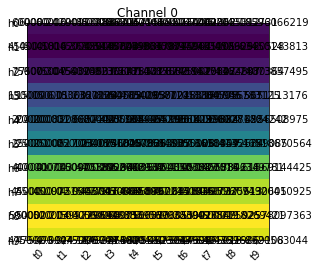

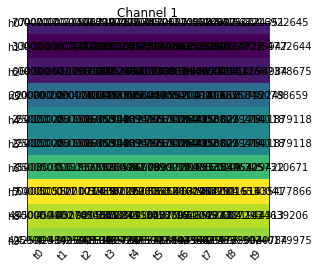

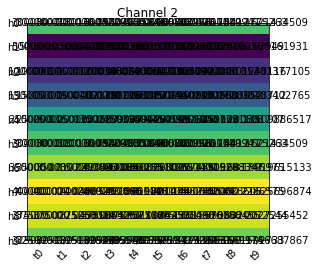

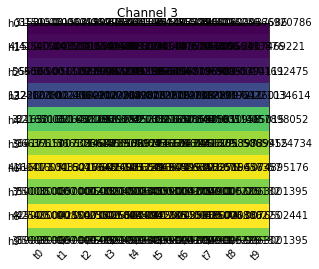

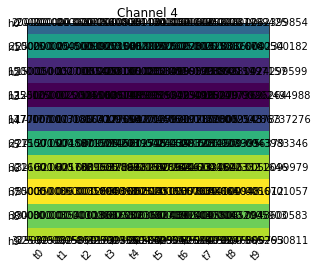

In [104]:
import numpy as np
import matplotlib.pyplot as plt

# https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_annotated_heatmap.html
for i in range(len(coef_k)):
    rows_horarios = ["h0", "h1", "h2", "h3", "h4", "h5", "h6", "h7", "h8", "h9"]
    cols_times = ["t0", "t1", "t2", "t3", "t4", "t5", "t6", "t7", "t8", "t9"]
    f = open("channel_"+str(i)+".csv", "r")
    matrix = []
    pre_matrix = f.readlines()
    for item in pre_matrix:
        new_item = item.split(",")
        row = []
        for subitem in new_item:
            row.append(float(subitem.rstrip()))
        matrix.append(row)
    matrix_2 = np.array(matrix)
    fig, ax = plt.subplots()
    im = ax.imshow(matrix_2)
    ax.set_xticks(range(len(cols_times)))
    ax.set_yticks(range(len(rows_horarios)))
    ax.set_xticklabels(cols_times)
    ax.set_yticklabels(rows_horarios)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", 
            rotation_mode="anchor")
    for k in range(len(cols_times)):
        for j in range(len(rows_horarios)):
            text = ax.text(j, k, matrix_2[k, j],
                          ha="center", va="center")
    
    ax.set_title("Channel " + str(i))
#     fig.tight_layout()
    plt.show()
            
    f.close()


### 5) Comparaciones entre los métodos de los puntos (1) con Runge-Kutta de orden 4 y (2).
TODO

### 6) Analizar los datos obtenidos y sugerir una posible distribución del dinero disponible para que el impacto de la publicidad sea máximo.
TODO

## Conclusion
TODO